In [22]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [23]:
#Loading Data
train=pd.read_csv('train.csv')

## Previewing Data

In [24]:
#previewing Data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dropping the features we don't want to use

In [25]:

train=train.drop(['Name','Ticket','PassengerId','Cabin'],axis=1)

## Describing numerical values

In [26]:

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking for missing values

In [27]:
train.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## Filling missing values

In [28]:
train.Age.fillna(train.Age.mean(),inplace=True) # Filling the missing age values with mean age values
train.Embarked.fillna('S',inplace=True) # Since most people embarked from S we fill missing values with S
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
train.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Function for plotting Categories

In [30]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()


## Plotting Embarked vs Survived

/home/aditya/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


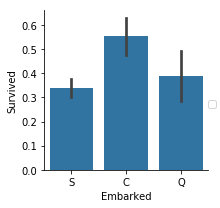

In [31]:
plot_categories(train,cat='Embarked',target='Survived')

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


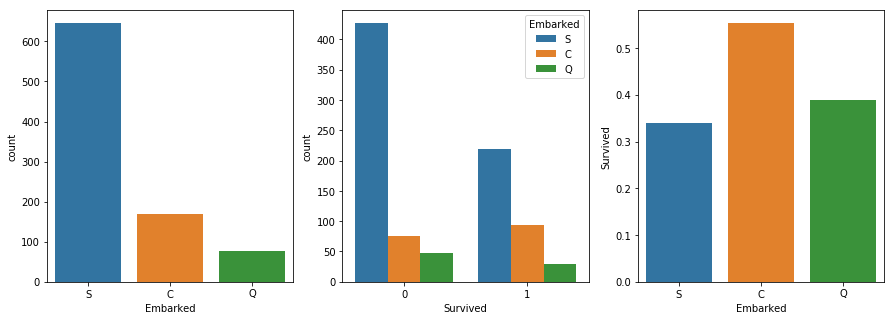

In [32]:
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked',data=train,ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train, order=[0,1], ax=axis2)
embark_perc=train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()
print(embark_perc)
sns.barplot(x='Embarked',y='Survived',data=embark_perc,order=['S','C','Q'],ax=axis3)

## Pclass vs Survived

/home/aditya/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


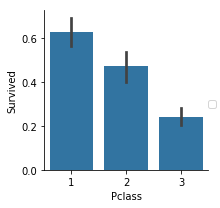

In [33]:
plot_categories(train,cat='Pclass',target='Survived')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


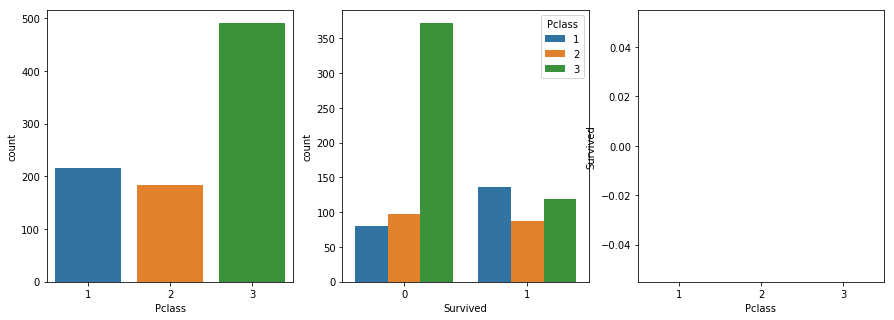

In [34]:
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Pclass',data=train,ax=axis1)
sns.countplot(x='Survived', hue="Pclass", data=train, order=[0,1], ax=axis2)
pclass_perc=train[['Survived','Pclass']].groupby(['Pclass'],as_index=False).mean()
print(pclass_perc)
sns.barplot(x='Pclass',y='Survived',data=pclass_perc,order=['1','2','3'],ax=axis3)

## Sex vs Survived

/home/aditya/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


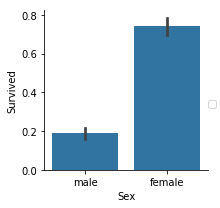

In [35]:
plot_categories(train,cat='Sex',target='Survived')

## Survived Countplot

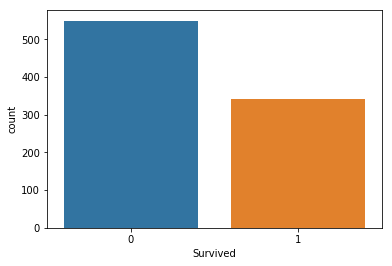

In [36]:
sns.countplot(train.Survived)

## Histogram of Fare

/home/aditya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


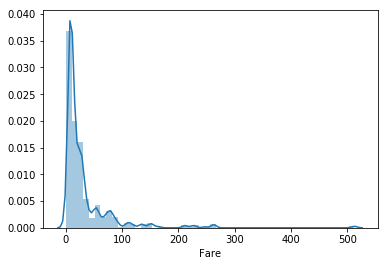

In [37]:
sns.distplot(train.Fare)

## Histogram of Age

/home/aditya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


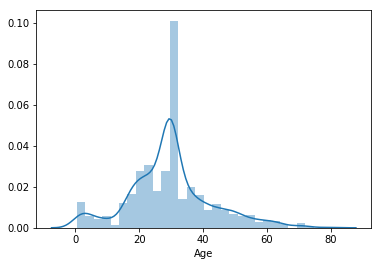

In [38]:
sns.distplot(train.Age)

## Heatmap of Features

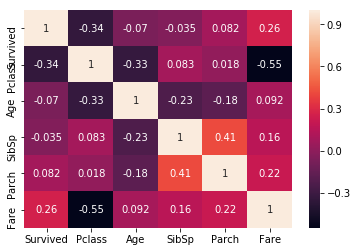

In [39]:
corr=train.corr()
sns.heatmap(corr,annot=True)

## Getting Target Values

In [40]:
y=train.Survived 
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Dropping target values from input

In [41]:
train=train.drop(['Survived'],axis=1) 
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


 ## Dividing Embarked 'C,Q,S' into 3 separate categorical columns

In [42]:
embarked=pd.get_dummies(train.Embarked,prefix='Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


 ## Dividing Embarked 'C,Q,S' into 3 separate categorical columns

In [43]:
pclass=pd.get_dummies(train.Pclass,prefix='Pclass') #Dividing Pclass '1,2,3' into 3 separate categorical columns
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


## Categorizing male ,female as 0,1 

In [44]:
sex=pd.Series(np.where(train.Sex=='Male',1,0),name='Sex') 

## Min-Max normalization of non categorical datas

In [45]:
train.Age=(train.Age-train.Age.min())/(train.Age.max()-train.Age.min()) #Min-Max normalization of Age
train.Fare=(train.Fare-train.Fare.min())/(train.Fare.max()-train.Fare.min()) #Min-Max Normalization of Fare
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.271174,1,0,0.014151,S
1,1,female,0.472229,1,0,0.139136,C
2,3,female,0.321438,0,0,0.015469,S
3,1,female,0.434531,1,0,0.103644,S
4,3,male,0.434531,0,0,0.015713,S


 ## Getting all columns together we want to use as input

In [46]:
train1=pd.concat([train.Fare,train.Age,embarked,sex,pclass],axis=1)

In [47]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.271174,1,0,0.014151,S
1,1,female,0.472229,1,0,0.139136,C
2,3,female,0.321438,0,0,0.015469,S
3,1,female,0.434531,1,0,0.103644,S
4,3,male,0.434531,0,0,0.015713,S


## Previewing the input

In [48]:
train1.head() 

,Fare,Age,Embarked_C,Embarked_Q,Embarked_S,Sex,Pclass_1,Pclass_2,Pclass_3
0,0.014151,0.271174,0,0,1,0,0,0,1
1,0.139136,0.472229,1,0,0,0,1,0,0
2,0.015469,0.321438,0,0,1,0,0,0,1
3,0.103644,0.434531,0,0,1,0,1,0,0
4,0.015713,0.434531,0,0,1,0,0,0,1


## Converting dataset into array and finding no. of training sets

In [49]:
X=np.array(train1) #
X.shape #checking the shape of array
m=len(X) #no. of training sets 

## Defining Sigmoid functions

In [50]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

## Initializing Weight, Bias and Learning Parameter

In [51]:
alpha=2.8 # Learning parameter
w=np.random.rand(1,9)*10 #Weight Vector
b=np.random.rand(1)*10
print(w)
print(b)
y=np.array(y) # Converting target dataset to array
y=y.reshape(891,1) #Giving it a definite dimension
y.shape

[[6.47292736 6.25990714 9.15997732 2.27885182 9.01890982 9.81838362
  9.16848254 0.03693435 9.85389339]]
[2.70574898]


(891, 1)

In [52]:
## Implementing Logistic Regression

In [53]:
for i in range(5000): # No. of gradient descent iterations
    z=np.dot(w,X.T)+b # Logistic Regression Algorithm starts
    a=sigmoid(z)  #Applying Sigmoid function
    J=-(np.dot(y.T,(np.log(a)).T)+np.dot(1-y.T,(np.log(1-a)).T))/m # cost function
    print(J) #printing cost function after each iteration to see whether it's decreasing or not
    dw=np.dot((a-y.T),X) #Calculating the change in weight vector 
    w=w-(alpha/m)*dw #Changing weight vector
    
    
    
    b=b-(alpha/m)*np.sum(a-y.T)
    

[[13.44793389]]
[[11.01738474]]
[[8.58722732]]
[[6.16587538]]
[[3.90245925]]
[[2.28765772]]
[[1.56808033]]
[[1.46881352]]
[[1.40005347]]
[[1.3346309]]
[[1.27079597]]
[[1.20849119]]
[[1.147968]]
[[1.08957758]]
[[1.03372152]]
[[0.9808252]]
[[0.93130871]]
[[0.88555226]]
[[0.84386035]]
[[0.80643172]]
[[0.77334163]]
[[0.74453901]]
[[0.71985627]]
[[0.69902686]]
[[0.6817067]]
[[0.66749767]]
[[0.65597288]]
[[0.64670266]]
[[0.63927842]]
[[0.63333138]]
[[0.62854396]]
[[0.62465366]]
[[0.62145088]]
[[0.61877282]]
[[0.61649569]]
[[0.6145268]]
[[0.61279741]]
[[0.61125669]]
[[0.60986709]]
[[0.60860068]]
[[0.6074365]]
[[0.60635861]]
[[0.6053547]]
[[0.6044151]]
[[0.60353206]]
[[0.60269927]]
[[0.60191152]]
[[0.6011644]]
[[0.60045416]]
[[0.59977757]]
[[0.5991318]]
[[0.59851438]]
[[0.59792311]]
[[0.59735605]]
[[0.59681146]]
[[0.59628779]]
[[0.59578362]]
[[0.59529769]]
[[0.59482887]]
[[0.59437611]]
[[0.59393847]]
[[0.59351509]]
[[0.5931052]]
[[0.59270808]]
[[0.59232306]]
[[0.59194957]]
[[0.59158703]]
[[0.5

[[0.57460115]]
[[0.5745994]]
[[0.57459765]]
[[0.57459592]]
[[0.57459419]]
[[0.57459246]]
[[0.57459074]]
[[0.57458903]]
[[0.57458732]]
[[0.57458562]]
[[0.57458392]]
[[0.57458223]]
[[0.57458054]]
[[0.57457886]]
[[0.57457719]]
[[0.57457552]]
[[0.57457385]]
[[0.5745722]]
[[0.57457054]]
[[0.5745689]]
[[0.57456726]]
[[0.57456562]]
[[0.57456399]]
[[0.57456236]]
[[0.57456075]]
[[0.57455913]]
[[0.57455752]]
[[0.57455592]]
[[0.57455432]]
[[0.57455273]]
[[0.57455114]]
[[0.57454956]]
[[0.57454798]]
[[0.57454641]]
[[0.57454485]]
[[0.57454328]]
[[0.57454173]]
[[0.57454018]]
[[0.57453863]]
[[0.57453709]]
[[0.57453556]]
[[0.57453403]]
[[0.5745325]]
[[0.57453099]]
[[0.57452947]]
[[0.57452796]]
[[0.57452646]]
[[0.57452496]]
[[0.57452346]]
[[0.57452198]]
[[0.57452049]]
[[0.57451901]]
[[0.57451754]]
[[0.57451607]]
[[0.57451461]]
[[0.57451315]]
[[0.57451169]]
[[0.57451024]]
[[0.5745088]]
[[0.57450736]]
[[0.57450592]]
[[0.57450449]]
[[0.57450307]]
[[0.57450165]]
[[0.57450023]]
[[0.57449882]]
[[0.57449742]]


[[0.57415256]]
[[0.57415238]]
[[0.57415221]]
[[0.57415203]]
[[0.57415185]]
[[0.57415168]]
[[0.5741515]]
[[0.57415133]]
[[0.57415116]]
[[0.57415098]]
[[0.57415081]]
[[0.57415064]]
[[0.57415047]]
[[0.5741503]]
[[0.57415013]]
[[0.57414996]]
[[0.57414979]]
[[0.57414963]]
[[0.57414946]]
[[0.57414929]]
[[0.57414913]]
[[0.57414896]]
[[0.5741488]]
[[0.57414863]]
[[0.57414847]]
[[0.57414831]]
[[0.57414815]]
[[0.57414798]]
[[0.57414782]]
[[0.57414766]]
[[0.5741475]]
[[0.57414735]]
[[0.57414719]]
[[0.57414703]]
[[0.57414687]]
[[0.57414672]]
[[0.57414656]]
[[0.57414641]]
[[0.57414625]]
[[0.5741461]]
[[0.57414594]]
[[0.57414579]]
[[0.57414564]]
[[0.57414549]]
[[0.57414534]]
[[0.57414518]]
[[0.57414503]]
[[0.57414489]]
[[0.57414474]]
[[0.57414459]]
[[0.57414444]]
[[0.57414429]]
[[0.57414415]]
[[0.574144]]
[[0.57414385]]
[[0.57414371]]
[[0.57414357]]
[[0.57414342]]
[[0.57414328]]
[[0.57414314]]
[[0.57414299]]
[[0.57414285]]
[[0.57414271]]
[[0.57414257]]
[[0.57414243]]
[[0.57414229]]
[[0.57414215]]
[[

[[0.57411038]]
[[0.57411036]]
[[0.57411035]]
[[0.57411033]]
[[0.57411032]]
[[0.5741103]]
[[0.57411029]]
[[0.57411027]]
[[0.57411026]]
[[0.57411024]]
[[0.57411023]]
[[0.57411021]]
[[0.5741102]]
[[0.57411018]]
[[0.57411017]]
[[0.57411015]]
[[0.57411014]]
[[0.57411013]]
[[0.57411011]]
[[0.5741101]]
[[0.57411008]]
[[0.57411007]]
[[0.57411006]]
[[0.57411004]]
[[0.57411003]]
[[0.57411001]]
[[0.57411]]
[[0.57410999]]
[[0.57410997]]
[[0.57410996]]
[[0.57410995]]
[[0.57410993]]
[[0.57410992]]
[[0.57410991]]
[[0.57410989]]
[[0.57410988]]
[[0.57410987]]
[[0.57410985]]
[[0.57410984]]
[[0.57410983]]
[[0.57410981]]
[[0.5741098]]
[[0.57410979]]
[[0.57410977]]
[[0.57410976]]
[[0.57410975]]
[[0.57410974]]
[[0.57410972]]
[[0.57410971]]
[[0.5741097]]
[[0.57410969]]
[[0.57410967]]
[[0.57410966]]
[[0.57410965]]
[[0.57410964]]
[[0.57410962]]
[[0.57410961]]
[[0.5741096]]
[[0.57410959]]
[[0.57410958]]
[[0.57410956]]
[[0.57410955]]
[[0.57410954]]
[[0.57410953]]
[[0.57410952]]
[[0.5741095]]
[[0.57410949]]
[[0.5

[[0.57410686]]
[[0.57410686]]
[[0.57410686]]
[[0.57410686]]
[[0.57410685]]
[[0.57410685]]
[[0.57410685]]
[[0.57410685]]
[[0.57410685]]
[[0.57410685]]
[[0.57410685]]
[[0.57410685]]
[[0.57410685]]
[[0.57410684]]
[[0.57410684]]
[[0.57410684]]
[[0.57410684]]
[[0.57410684]]
[[0.57410684]]
[[0.57410684]]
[[0.57410684]]
[[0.57410684]]
[[0.57410683]]
[[0.57410683]]
[[0.57410683]]
[[0.57410683]]
[[0.57410683]]
[[0.57410683]]
[[0.57410683]]
[[0.57410683]]
[[0.57410683]]
[[0.57410683]]
[[0.57410682]]
[[0.57410682]]
[[0.57410682]]
[[0.57410682]]
[[0.57410682]]
[[0.57410682]]
[[0.57410682]]
[[0.57410682]]
[[0.57410682]]
[[0.57410681]]
[[0.57410681]]
[[0.57410681]]
[[0.57410681]]
[[0.57410681]]
[[0.57410681]]
[[0.57410681]]
[[0.57410681]]
[[0.57410681]]
[[0.57410681]]
[[0.57410681]]
[[0.5741068]]
[[0.5741068]]
[[0.5741068]]
[[0.5741068]]
[[0.5741068]]
[[0.5741068]]
[[0.5741068]]
[[0.5741068]]
[[0.5741068]]
[[0.5741068]]
[[0.57410679]]
[[0.57410679]]
[[0.57410679]]
[[0.57410679]]
[[0.57410679]]
[[0.5

[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.57410659]]
[[0.574106

[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.574106

[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.57410657]]
[[0.574106

## Printing Results

In [54]:
print(a)
print(w)
print(b)

[[0.21489185 0.69991284 0.19195335 0.57540915 0.1464743  0.35278835
  0.40387173 0.37552331 0.18863839 0.73139387 0.35411648 0.34300521
  0.22799943 0.14172429 0.2682765  0.24696495 0.62016217 0.44697645
  0.17189784 0.26773743 0.41452957 0.40889066 0.48081585 0.61698776
  0.32612874 0.14624825 0.26773743 0.86333961 0.35218366 0.1720197
  0.63996286 0.81630581 0.35204882 0.17680553 0.77878755 0.51139236
  0.2677412  0.22169181 0.24941455 0.39661962 0.12598138 0.48035808
  0.26833952 0.81037839 0.44467016 0.1721202  0.36017843 0.35204882
  0.28089925 0.2492433  0.35333684 0.22149453 0.61625508 0.46801425
  0.45688904 0.60235501 0.52261169 0.27633505 0.67885216 0.32823561
  0.32575128 0.57894507 0.52023808 0.36592148 0.72071578 0.27499258
  0.45040626 0.23452139 0.24756577 0.19247722 0.42369917 0.28963917
  0.59356656 0.30170752 0.19273858 0.19743027 0.1720197  0.1721202
  0.71200506 0.17345725 0.21624568 0.17671872 0.35208795 0.62944846
  0.55854952 0.16050752 0.27799315 0.1721202  0.84

## Fare vs Survival prediction

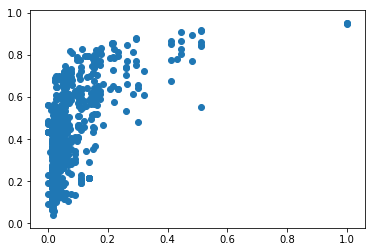

In [55]:
plt.scatter(x=train.Fare,y=a)

## age vs Survival Prediction

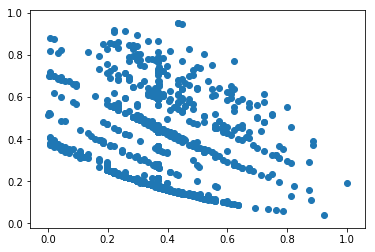

In [56]:
plt.scatter(x=train.Age,y=a)

## ROC_AUC

In [57]:
e=y.reshape(-1,1)
f=a.reshape(-1,1)
from sklearn.metrics import roc_auc_score
ROC_AUC=roc_auc_score(e,f)
print(ROC_AUC)

0.7455421340235835


## Embarked vs Prediction

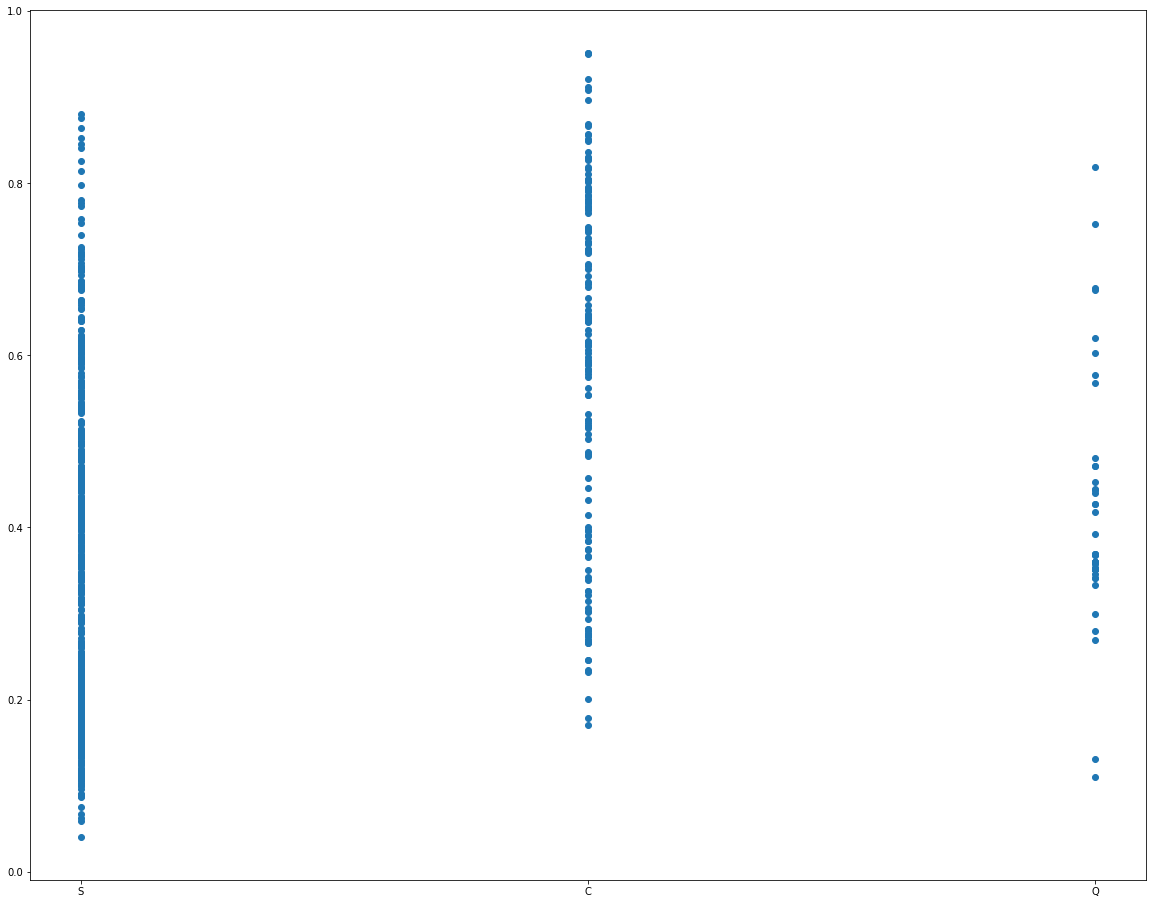

In [58]:
plt.figure(figsize=(20,16))
plt.scatter(x=train.Embarked,y=a)

## Pclass vs Prediction

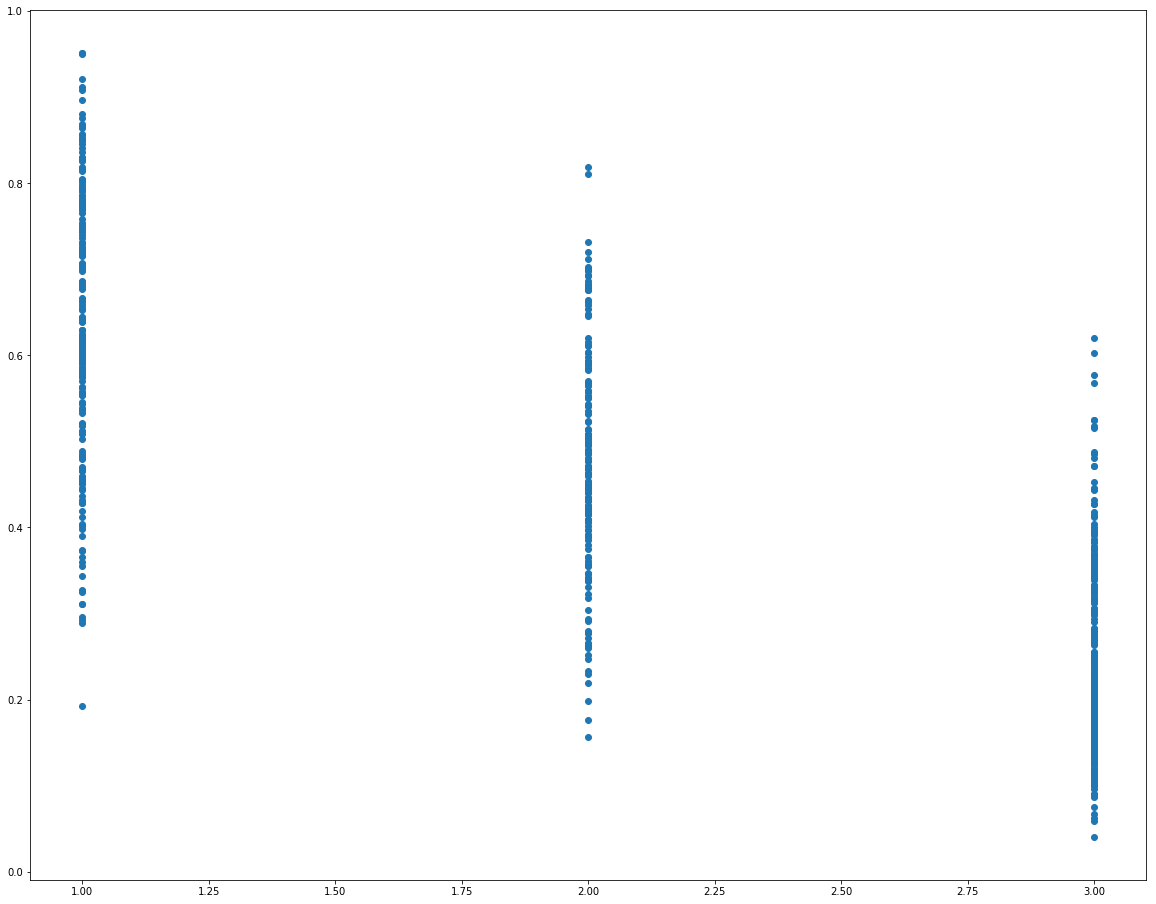

In [59]:
plt.figure(figsize=(20,16))
plt.scatter(x=train.Pclass,y=a)